In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot  as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=os.listdir("/content/drive/MyDrive/Covid_img/COVID_IEEE")
data

['covid', 'normal', 'virus']

In [4]:
diagnosis=[]
for item in data:
    all_data=os.listdir('/content/drive/MyDrive/Covid_img/COVID_IEEE'+"/"+item)

    for data1 in all_data:
        diagnosis.append((item, str('/content/drive/MyDrive/Covid_img/COVID_IEEE' + '/' +item) + '/' + data1))
        print(diagnosis[:1])

[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Co

In [5]:
diagnosis_df = pd.DataFrame(data=diagnosis, columns=['diagnosis', 'image'])
diagnosis_df


[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')]
[('covid', '/content/drive/MyDrive/C

,diagnosis,image
0,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
1,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
2,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
3,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
4,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
...,...,...
1818,virus,/content/drive/MyDrive/Covid_img/COVID_IEEE/vi...
1819,virus,/content/drive/MyDrive/Covid_img/COVID_IEEE/vi...
1820,virus,/content/drive/MyDrive/Covid_img/COVID_IEEE/vi...
1821,virus,/content/drive/MyDrive/Covid_img/COVID_IEEE/vi...


In [6]:
print("Total number of rooms in the dataset: ", len(diagnosis_df))

Total number of rooms in the dataset:  1823


In [7]:
diagnosis_df['diagnosis'].value_counts()

normal    668
virus     619
covid     536
Name: diagnosis, dtype: int64

In [8]:
import cv2
import os
import numpy as np

path = '/content/drive/MyDrive/Covid_img/COVID_IEEE/'
im_size = 128

images = []
labels = []

data = os.listdir(path)  # Assuming data contains the folder names in 'COVID_IEEE'

for folder_name in data:
    data_path = os.path.join(path, folder_name)
    filenames = [f for f in os.listdir(data_path) ]

    for filename in filenames:
        img_path = os.path.join(data_path, filename)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(folder_name)
        else:
            print(f'Could not read image: {img_path}')

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Display the shape of the images array
print('Shape of images array:', images.shape)


Shape of images array: (1823, 128, 128, 3)


Label for the first image: covid


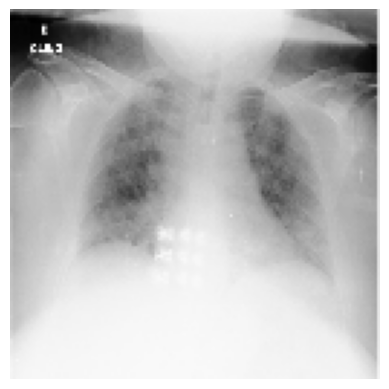

In [15]:
plt.imshow(images[0])
print('Label for the first image:', labels[0])
plt.axis('off')
plt.show()

In [ ]:
images = np.array(images)
images.shape

(1823, 128, 128, 3)

In [ ]:
images = images.astype('float32') / 255.0
images.shape

(1823, 128, 128, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder

In [ ]:
y=diagnosis_df['diagnosis'].values
y

array(['covid', 'covid', 'covid', ..., 'virus', 'virus', 'virus'],
      dtype=object)

In [ ]:
encoder=LabelEncoder ()
y = encoder.fit_transform (y)
y.shape

(1823,)

In [ ]:
from sklearn.compose import ColumnTransformer
y=y.reshape(-1,1)
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])],
    remainder='passthrough'
)

# Fit and transform the data using the ColumnTransformer
Y = ct.fit_transform(y)

# Print the shape of Y
print(Y.shape)

(1823, 3)


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
images, Y = shuffle(images, Y, random_state=1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1458, 128, 128, 3)
(1458, 3)
(365, 128, 128, 3)
(365, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()
# Convolution Layer 1
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", padding='same', input_shape = (128, 128, 3)))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolution Layer 2
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation = "relu"))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten & Linear Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 42, 42, 32)        0         
 Pooling2D)                                                      
                                                                 
 batch_normalization (Batch  (None, 42, 42, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 42, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 14, 14, 64)        0

In [ ]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
train_metrics=model.fit(train_x, train_y, epochs=15,  batch_size=32,validation_data=(test_x, test_y))

Epoch 1/15
46/46 [==============================] - 8s 35ms/step - loss: 1.0872 - accuracy: 0.7702 - val_loss: 0.8932 - val_accuracy: 0.5890
Epoch 2/15
46/46 [==============================] - 1s 18ms/step - loss: 0.4405 - accuracy: 0.8587 - val_loss: 0.7111 - val_accuracy: 0.6027
Epoch 3/15
46/46 [==============================] - 1s 18ms/step - loss: 0.3370 - accuracy: 0.8813 - val_loss: 0.9187 - val_accuracy: 0.5753
Epoch 4/15
46/46 [==============================] - 1s 19ms/step - loss: 0.2952 - accuracy: 0.9026 - val_loss: 0.9684 - val_accuracy: 0.5397
Epoch 5/15
46/46 [==============================] - 1s 19ms/step - loss: 0.2394 - accuracy: 0.9088 - val_loss: 0.8733 - val_accuracy: 0.5945
Epoch 6/15
46/46 [==============================] - 1s 18ms/step - loss: 0.2229 - accuracy: 0.9163 - val_loss: 0.8519 - val_accuracy: 0.6110
Epoch 7/15
46/46 [==============================] - 1s 20ms/step - loss: 0.2056 - accuracy: 0.9204 - val_loss: 0.5738 - val_accuracy: 0.7726
Epoch 8/15
46

In [ ]:
history_df = pd.DataFrame(train_metrics.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.087203,0.770233,0.893199,0.589041
1,0.440508,0.858711,0.711111,0.602740
2,0.337026,0.881344,0.918729,0.575342
3,0.295217,0.902606,0.968385,0.539726
4,0.239393,0.908779,0.873316,0.594521
5,0.222898,0.916324,0.851894,0.610959
6,0.205597,0.920439,0.573836,0.772603
7,0.195022,0.930041,0.344956,0.849315
8,0.203057,0.933470,0.822660,0.698630
9,0.175575,0.940329,1.293155,0.561644


In [ ]:
train_loss = history_df["loss"]
train_accuracy = history_df["accuracy"]
test_loss = history_df["val_loss"]
test_accuracy = history_df["val_accuracy"]

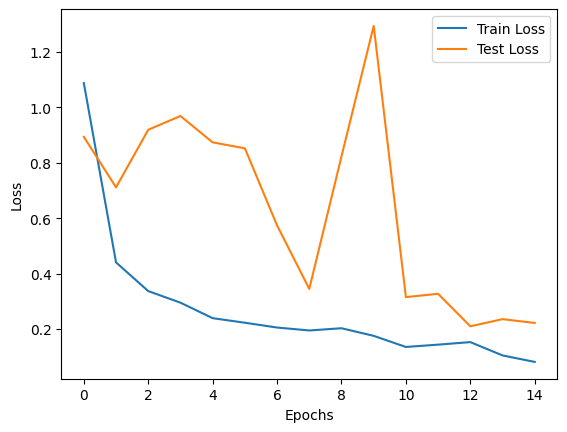

In [ ]:
plt.plot(range(15), train_loss, label = "Train Loss")
plt.plot(range(15), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


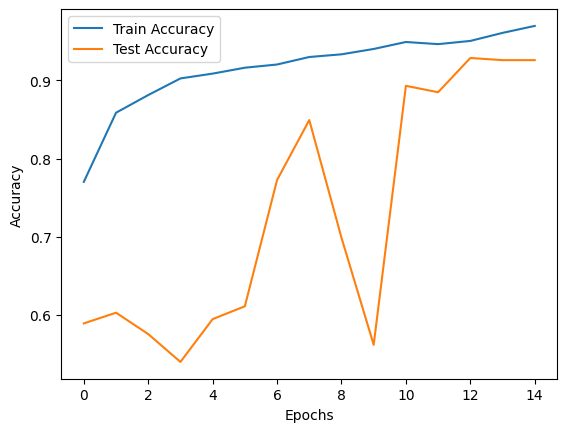

In [ ]:
plt.plot(range(15), train_accuracy, label = "Train Accuracy")
plt.plot(range(15), test_accuracy, label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()